# **Introduction**

Determining the size of the asteroid may lead us to some conclusion about the impact of the asteroid. Size of the asteroid is measured in terms of diameter and predicting the diameter of the asteroid may help us in our quest of approximating the dangers or benefits the asteroids presents to the planet. Let us look at the data:


# Importing Data & Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

In [3]:
#Reading the csv file in a dataframe
df=pd.read_csv('Asteroid.csv')
df.head()

,full_name,a,e,G,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589



# Exploratory Data Analysis & Visualisation

In [4]:
# to check the number of rows and columns in the dataset
df.shape

(839736, 27)

In [5]:
# to check out the  information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   

In [6]:
# Function to calculate missing values by column 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# Checking the missing values in the dataset
missing_values_table(df)

Your selected dataframe has 27 columns.
There are 20 columns that have missing values.


,Missing Values,% of Total Values
IR,839735,100.0
GM,839722,100.0
extent,839718,100.0
G,839617,100.0
UB,838757,99.9
spec_T,838756,99.9
BV,838715,99.9
spec_B,838070,99.8
rot_per,820940,97.8
albedo,703284,83.8


As the datatype of our dependent variable i.e. 'diameter' is object, converting it to numeric variable. And any errors if occurs then it will be set to Nan values. Also we can see that the dependent variable has huge amount of missing data, so dropping such observations where value of dependent variable not present.

In [8]:
#transforming to numeric, setting errors to NaN
df['diameter']= pd.to_numeric(df['diameter'],errors='coerce') 

#rows with nan diameters to drop
dropindexes = df['diameter'][df['diameter'].isnull()].index 
df = df.drop(dropindexes, axis=0) 

In [9]:
df.shape

(137680, 27)

In [10]:
missing_values_table(df)

Your selected dataframe has 27 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
IR,137679,100.0
GM,137667,100.0
extent,137665,100.0
G,137562,99.9
UB,136716,99.3
spec_T,136716,99.3
BV,136676,99.3
spec_B,136311,99.0
rot_per,126493,91.9
albedo,1232,0.9


### Dropping Features

In [11]:
#Dropping the features with high ratio of missing values i.e. in this case more than 90% and full_name(as it is not relevant)
df=df.drop(['full_name','G','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T'],axis=1)
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,0.0900,N,N,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,0.1010,N,N,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,0.2140,N,N,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,0.4228,N,N,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,0.2740,N,N,1.09589


In [12]:
missing_values_table(df)

Your selected dataframe has 17 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
albedo,1232,0.9
H,751,0.5
data_arc,140,0.1


Let us check how the data is distributed.

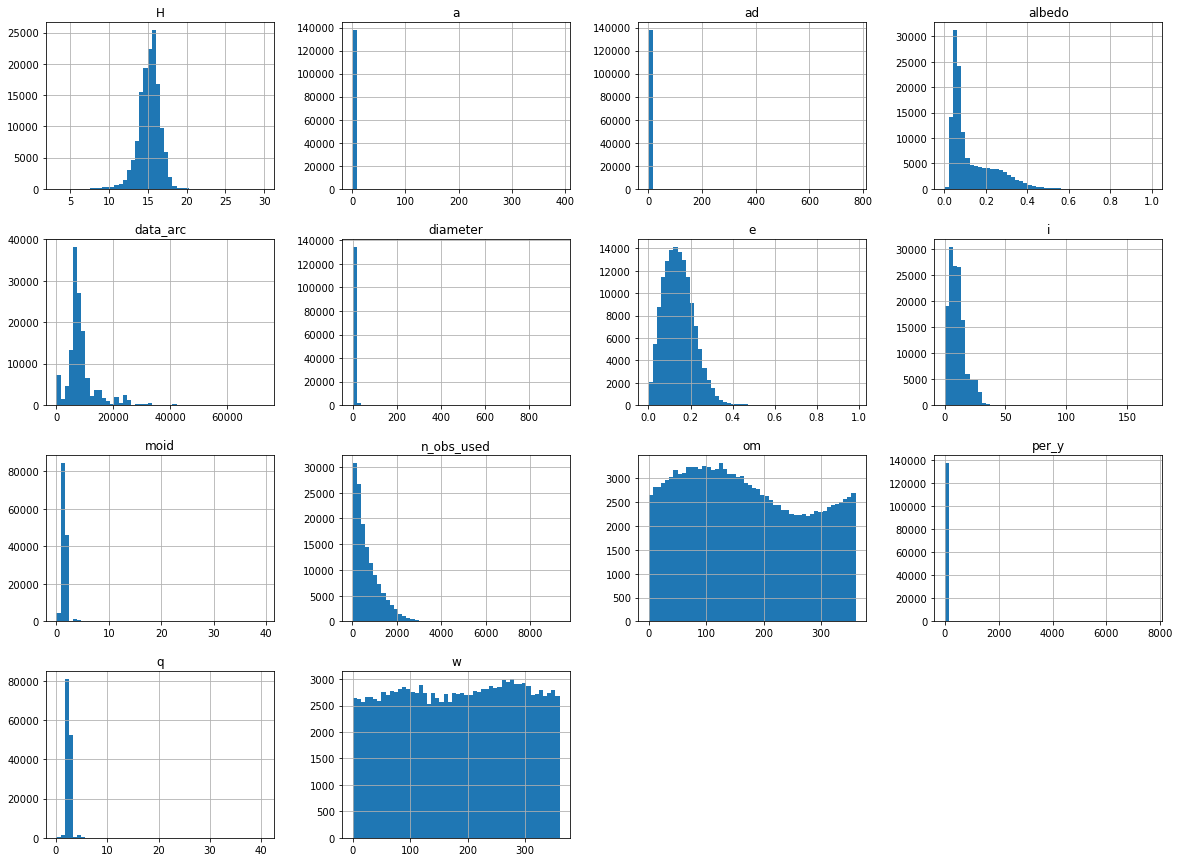

In [13]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

###  Exploration of Target Variable - Diameter

count    137680.000000
mean          5.480873
std           9.365499
min           0.002500
25%           2.770000
50%           3.956000
75%           5.741000
max         939.400000
Name: diameter, dtype: float64


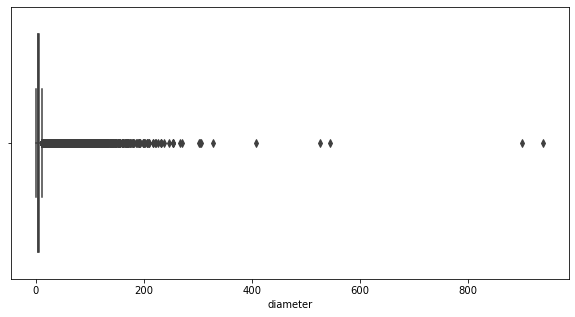

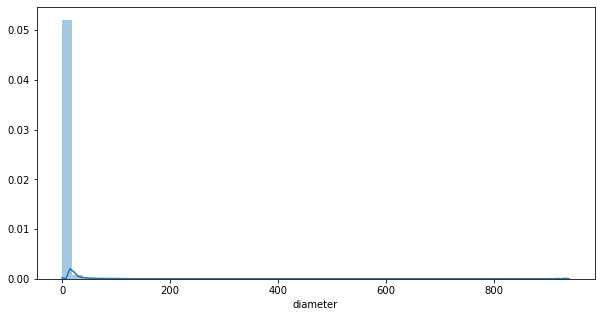

In [14]:
# Let us first look at the dependent variable
print(df['diameter'].describe())

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(x=df['diameter'])
plt.show()

# Distribution on dependent variable
plt.figure(figsize=(10,5))
sns.distplot(df['diameter']);
plt.show()

As we can see that the dependent variable is highly positive skewed . The difference between the 75th percentile and the maximum value is very large. However the outliers in this case are asteroids with high diameters which is  relevant  data . So for now, we will not remove outliers. However we will check if transformation will help reduce skewness. As can be seen below, log transformation does help with the skewness problem.

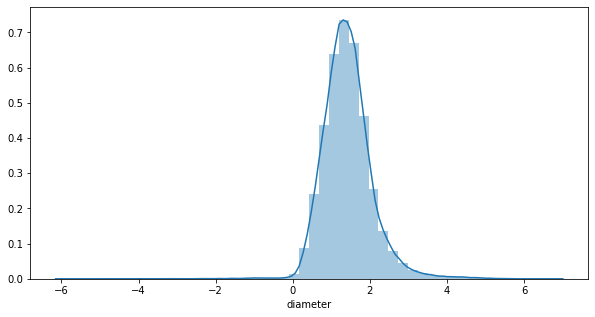

In [15]:
# Distribution on dependent variable
plt.figure(figsize=(10,5))
sns.distplot(np.log(df['diameter']));
plt.show()

### Handling missing data

#### data_arc - Missing values

count    137540.000000
mean       8908.697681
std        6150.505469
min           1.000000
25%        6265.000000
50%        7492.000000
75%        9655.000000
max       72684.000000
Name: data_arc, dtype: float64

The maximum repeated value is :  1.0


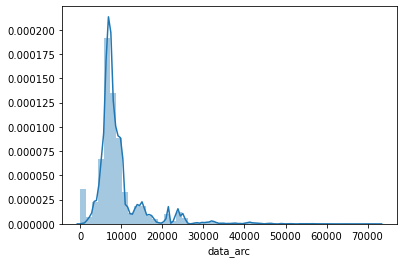

In [16]:
sns.distplot(df.data_arc.dropna())
#descrption about data_arc feature
print(df['data_arc'].describe())
print('\nThe maximum repeated value is : ',df['data_arc'].value_counts().index[0])

In [17]:
#Since median is greater than mean, it is positively skewed. Hence, imputing with median.
df['data_arc'].fillna(df['data_arc'].median() , inplace = True) # median is the best option here 

#### H Missing values

count    136929.00000
mean         15.17739
std           1.40739
min           3.20000
25%          14.40000
50%          15.30000
75%          16.10000
max          29.90000
Name: H, dtype: float64

The maximum repeated value is :  15.2


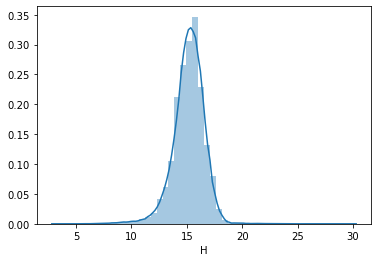

In [18]:
sns.distplot(df.H.dropna())
print(df['H'].describe())
print('\nThe maximum repeated value is : ',df['H'].value_counts().index[0])

In [19]:
# Since mean and median are close, imputing the missing values with mean.
df['H'].fillna(df['H'].mean() , inplace = True)

#### Albedo - Missing Values

count    136448.000000
mean          0.130050
std           0.109984
min           0.001000
25%           0.053000
50%           0.078000
75%           0.188000
max           1.000000
Name: albedo, dtype: float64

The maximum repeated value is :  0.057


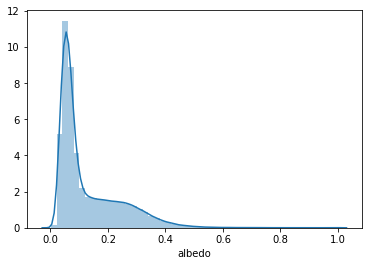

In [20]:
sns.distplot(df.albedo.dropna())
print(df['albedo'].describe())
print('\nThe maximum repeated value is : ',df['albedo'].value_counts().index[0])

In [21]:
#Since median is greater than mean, it is positively skewed. Hence, imputing with median.
df['albedo'].fillna(df['albedo'].median() , inplace = True)

In [22]:
missing_values_table(df)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [23]:
# To know the categries present in the categorical features.
list_of_cols = df.select_dtypes(['object'])
for col in list_of_cols:
    print(str(col) + ": "+ str(df[col].unique()))

condition_code: [0 1 3 2 '0' '1' '2' '3' '4' '5' '9' '7' 5.0 6.0 4.0 7.0 9.0 8.0 '8' '6']
neo: ['N' 'Y']
pha: ['N' 'Y']


#### Condition Code

Condition code is the orbit condition code which has the value between 0 and 9. As we can see from above, the values are in different formats.

In [24]:
df['condition_code'] = df['condition_code'].astype('int32')
print(df.condition_code.value_counts())
df['condition_code'] = df['condition_code'].astype('object')

0    128209
9      6551
1      1372
2       397
5       334
7       207
6       188
4       177
3       168
8        77
Name: condition_code, dtype: int64


In [25]:
cat_col = df.select_dtypes(include=['object']).copy()
numeric_df=df.select_dtypes('number')
print('Categorical columns : ',cat_col.columns)
print('Numeric columns : ',numeric_df.columns)

Categorical columns :  Index(['condition_code', 'neo', 'pha'], dtype='object')
Numeric columns :  Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used',
       'H', 'diameter', 'albedo', 'moid'],
      dtype='object')


### Analyzing numerical variables

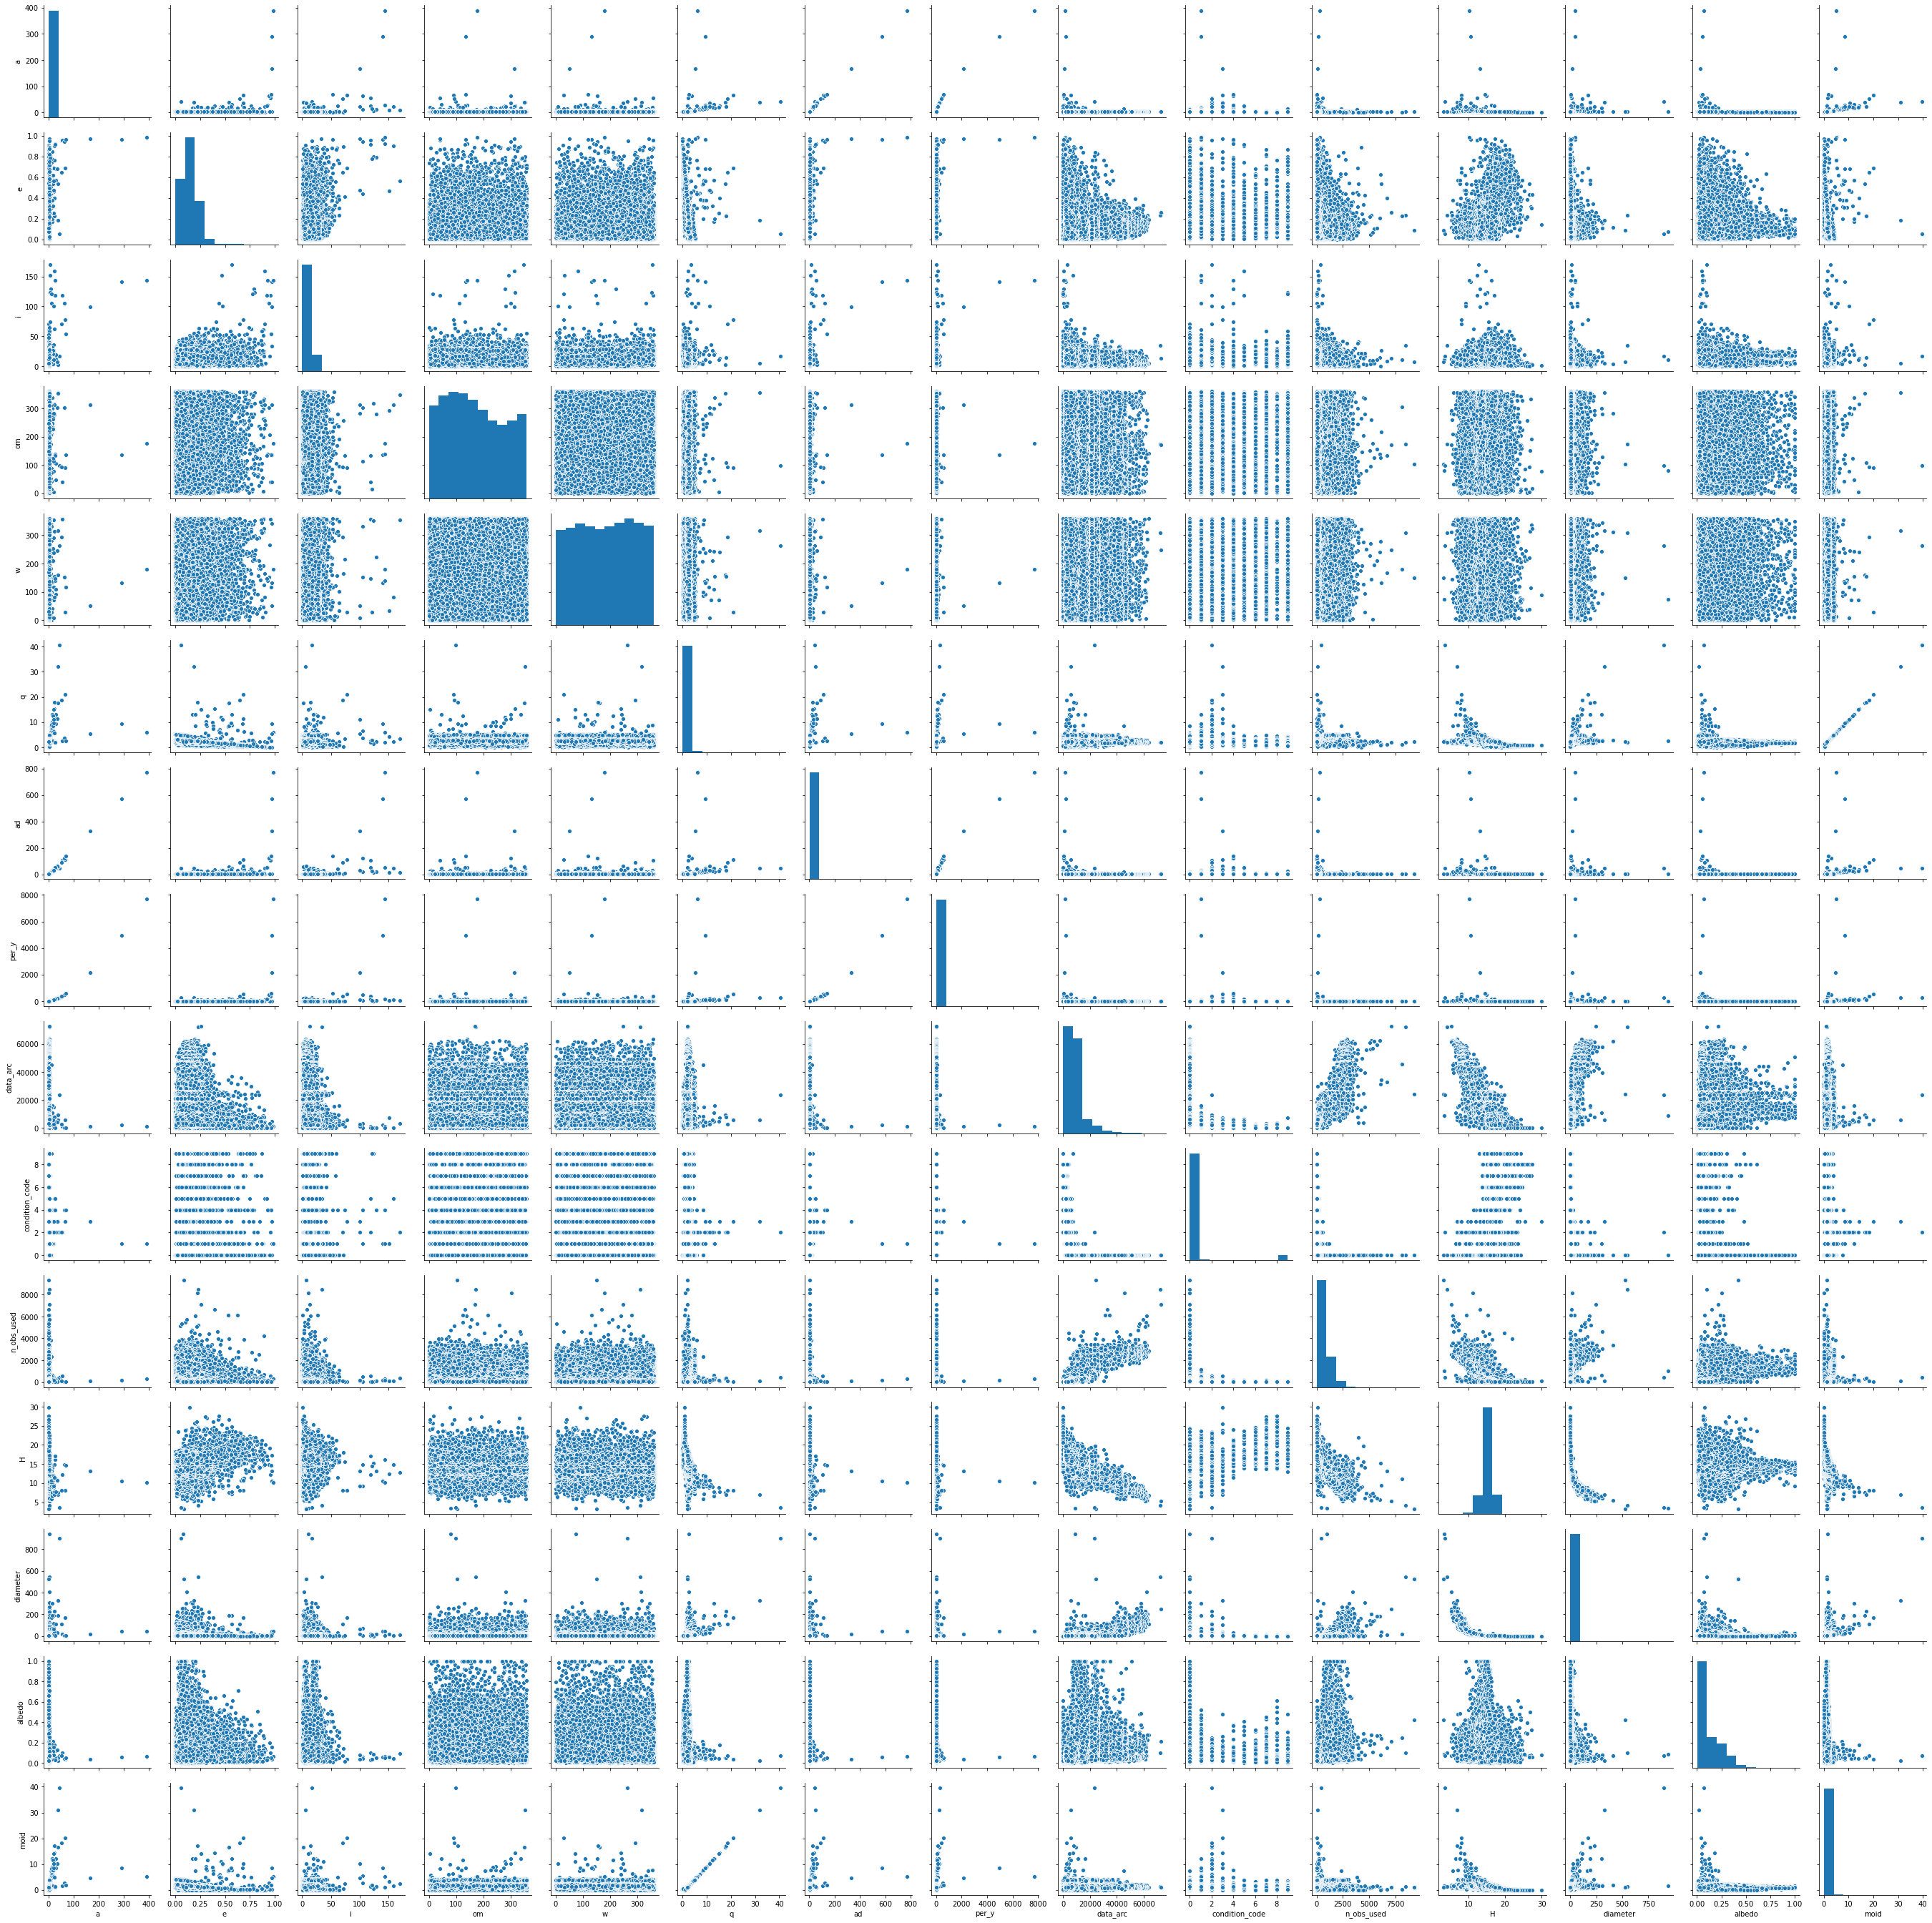

In [26]:
sns.pairplot(df) # scatter matrix
plt.show()

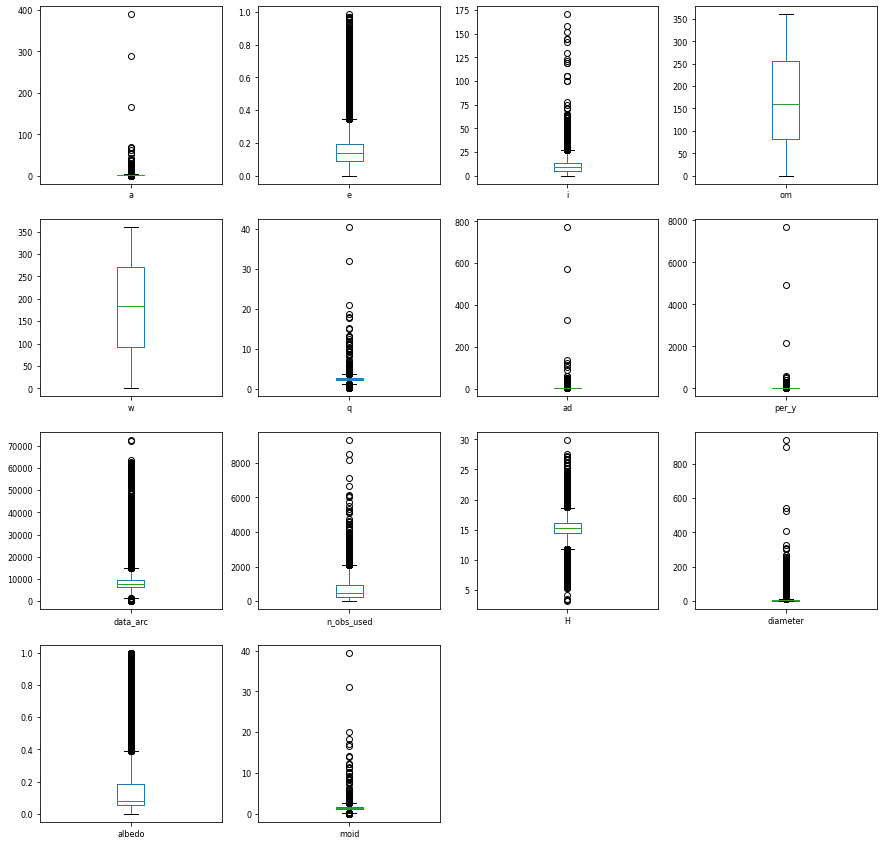

In [27]:
numeric_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize = (15, 15))
plt.show()

We see that high number of outliers are present in maximum features. Many machine learning models, like linear regression, are easily impacted by the outliers in the training data. As tree-based methods are less impacted by outliers, we can use the same.

### Analyzing Categorical variables

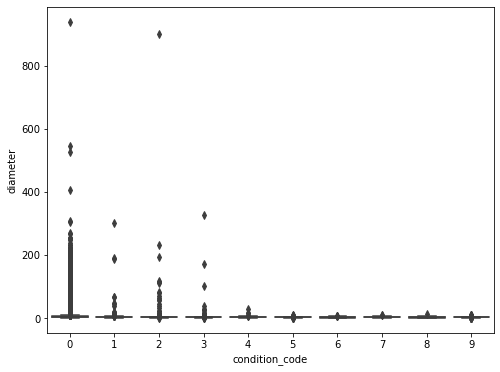

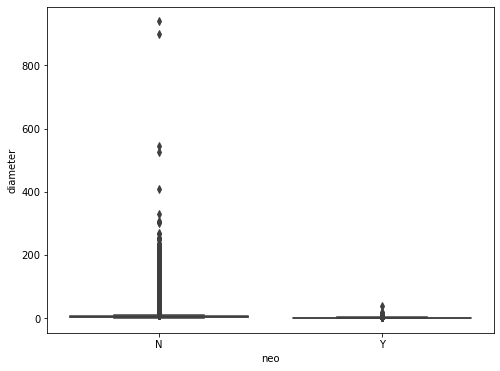

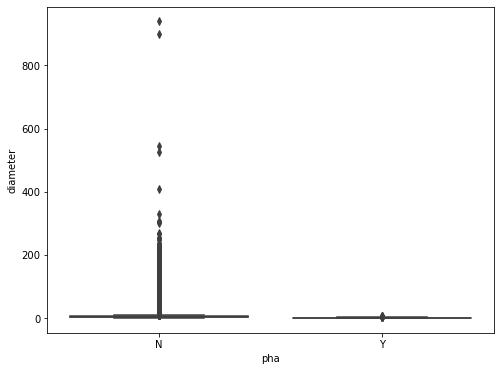

In [28]:
# Let us check distribution of categorical variables with respect to target variable.
for col in cat_col:
    data = pd.concat([df['diameter'], df[col]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=col, y="diameter", data=df)

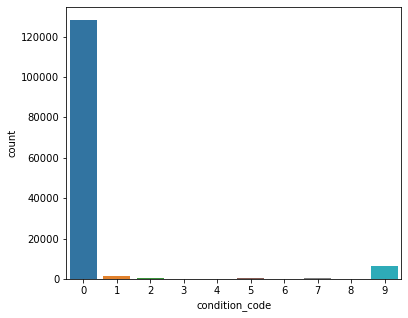

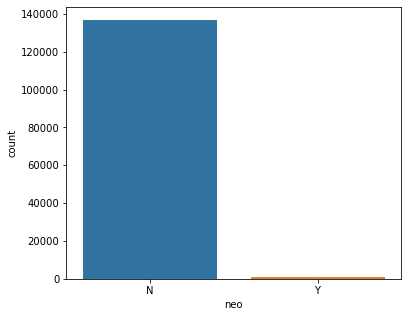

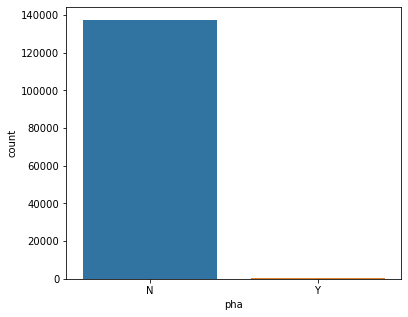

In [29]:
# As we can see that
for col in cat_col:
    plt.figure(figsize=(6,5))
    sns.countplot(x = df[col])
    plt.show()

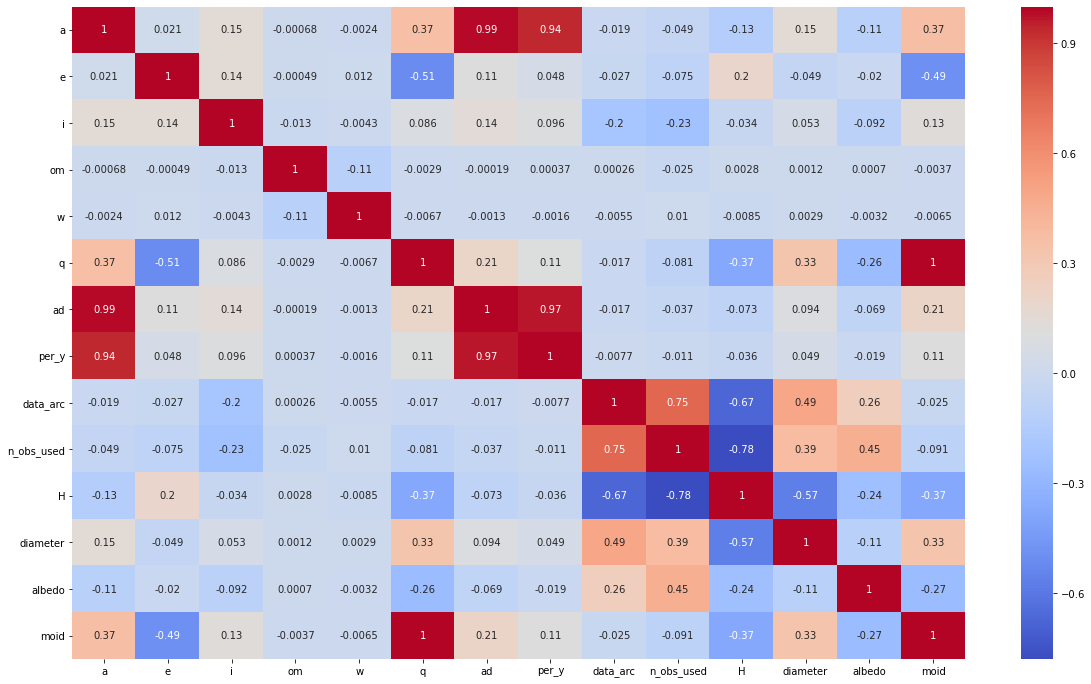

In [30]:
# Figure size
cor=df.corr()
plt.figure(figsize=(20,12))

# Heatmap
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()

The darker colours represent higher correlation. We can see that there multicollinearity present in the data. Let us look at the relationship of dependent variable with other variables after log transformation.

In [31]:
# Create columns with log of numeric columns
numeric_subset = numeric_df.copy()
numeric_subset['diameter'] = np.log(numeric_subset['diameter'])
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'diameter':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# One hot encode
categorical_subset = pd.get_dummies(cat_col)

# Join the two dataframes using concat
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features.corr()['diameter'].sort_values()

In [32]:
correlations.head(10)

log_H              -0.835468
H                  -0.832306
albedo             -0.268879
log_albedo         -0.254321
neo_Y              -0.227132
condition_code_9   -0.186249
e                  -0.184985
log_e              -0.157864
pha_Y              -0.121605
condition_code_1   -0.085541
Name: diameter, dtype: float64

In [33]:
correlations.tail(10)

log_ad        0.477244
n_obs_used    0.509806
data_arc      0.519253
moid          0.521080
q             0.522391
log_moid      0.528661
log_q         0.543708
log_per_y     0.563592
log_a         0.563592
diameter      1.000000
Name: diameter, dtype: float64

In [34]:
# Separating variables with high skewness for transformation. 
from scipy.stats import skew 
from scipy import stats
skew_features = df[numeric_df.columns].apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew = skew_features[abs(skew_features)>0.7]
skew_index = high_skew.index

In [35]:
for col in skew_index:
    print('Skewness of %s: %f'%(col,df[col].skew()))

Skewness of per_y: 254.302884
Skewness of ad: 203.525845
Skewness of a: 179.547107
Skewness of diameter: 26.043024
Skewness of moid: 7.597408
Skewness of q: 7.311342
Skewness of data_arc: 2.697089
Skewness of albedo: 1.709701
Skewness of i: 1.635546
Skewness of e: 1.395735
Skewness of n_obs_used: 1.372473


In [36]:
#Log transforming highly skewed data.
for i in skew_index:
    df[i] = np.log(df[i])

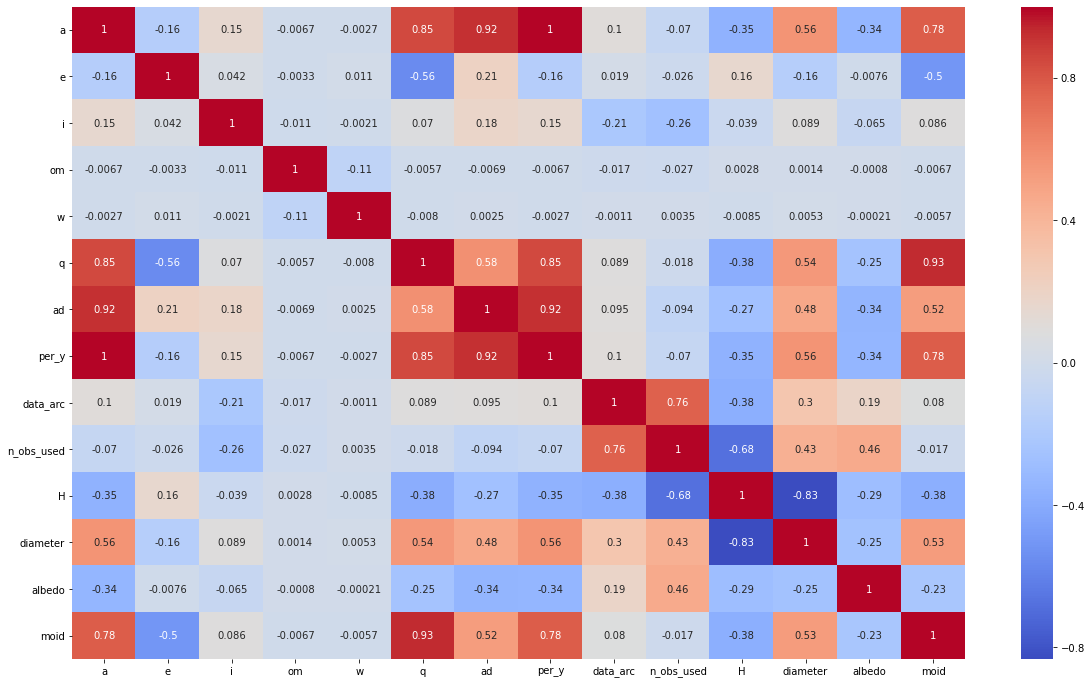

In [37]:
# Figure size
cor=df.corr()
plt.figure(figsize=(20,12))

# Heatmap
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()

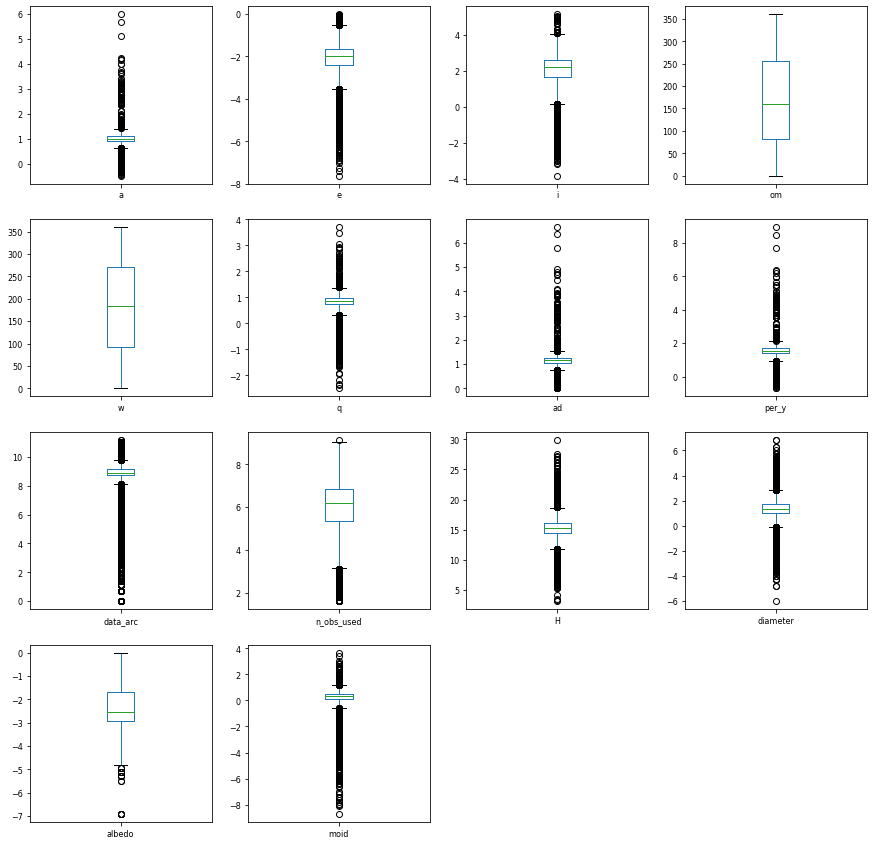

In [38]:
numeric_df=df.select_dtypes('number')
numeric_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize = (15, 15))
plt.show()

### OneHot Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
label_encode = LabelEncoder() 
onehot_encode = OneHotEncoder(sparse=False)

df['neo'] = label_encode.fit_transform(df['neo'])
df['pha'] = label_encode.fit_transform(df['pha'])

In [40]:
cat_df = pd.concat([df.condition_code , df.neo , df.pha] , axis = 1 )

In [41]:
onehot_encode.fit(cat_df)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [42]:
cat_df = onehot_encode.transform(cat_df)
cat_df

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [43]:
cat_df = pd.DataFrame(cat_df , columns= ['condition_code_0' , 'condition_code_1' , 'condition_code_2' , 'condition_code_3' , 'condition_code_4' , 'condition_code_5' , 'condition_code_6' , 'condition_code_7' , 'condition_code_8' , 'condition_code_9' , 'neo_0' , 'neo_1' , 'pha_0' , 'pha_1'])

In [44]:
# drooping the redudant columns and reseting the index 
df.drop(['condition_code','neo','pha',],axis=1,inplace=True)
df.reset_index(drop=True, inplace=True)

In [45]:
df1= pd.concat([df , cat_df ], axis=1)
df1.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,moid,condition_code_0,condition_code_1,condition_code_2,condition_code_3,condition_code_4,condition_code_5,condition_code_6,condition_code_7,condition_code_8,condition_code_9,neo_0,neo_1,pha_0,pha_1
0,1.018546,-2.576903,2.360294,80.305532,73.597694,0.939493,1.091805,1.527838,9.085004,6.909753,3.34,6.845241,-2.407946,0.466736,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.019737,-1.468213,3.550658,173.080063,310.048857,0.757935,1.227025,1.529625,11.188828,9.046644,4.13,6.300786,-2.292635,0.209645,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.981760,-1.358904,2.564097,169.852760,248.138626,0.684778,1.210442,1.472659,11.193877,8.868413,5.33,5.507751,-1.541779,0.033957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.859262,-2.422253,1.965961,103.810804,150.728541,0.766356,0.944266,1.288912,10.097738,9.140454,3.20,6.264160,-0.860856,0.130572,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.945558,-1.654987,1.680267,141.576604,358.687608,0.733485,1.120430,1.418356,11.057708,7.958926,6.85,4.670012,-1.294627,0.091567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Modelling

In [46]:
# Splitting independent and dependent variables.
X = df1.drop(['diameter'],axis=1)
y = df1['diameter']

#### Splitting the data into train and test 

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 10)

# Further splitting test data into test and validation set.
X_test , X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 10)

# Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

### Ridge Regression

In [48]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score , mean_squared_error

Ridge_regressor = Ridge(alpha=0.5)
Ridge_regressor.fit(X_train , y_train)

#prediciting the values of both train and test using the model 
Ridge_y_Train_pred = Ridge_regressor.predict(X_train)
Ridge_y_Test_pred = Ridge_regressor.predict(X_test)

# training and testing RMSE
Ridge_Train_RMSE = np.sqrt(mean_squared_error(y_train , Ridge_y_Train_pred))
Ridge_Test_RMSE = np.sqrt(mean_squared_error(y_test , Ridge_y_Test_pred))

# R-square score
Ridge_r2 = r2_score(y_test , Ridge_y_Test_pred)

# Displaying the value 
print('R_SQUARE_score is {}'.format(Ridge_r2))
print()
print('Training RMSE is {}'.format(Ridge_Train_RMSE))
print('Testing RMSE is {}'.format(Ridge_Test_RMSE))

R_SQUARE_score is 0.9600514751164463

Training RMSE is 0.12613926541631093
Testing RMSE is 0.1290604313000561


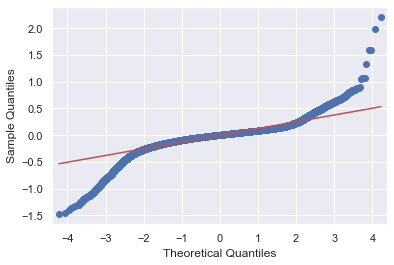

In [46]:
#Create a QQ Plot and interpret it?

import numpy as np 
import statsmodels.api as sm 
import pylab as py 
errors= y_train - Ridge_y_Train_pred     
sm.qqplot(errors,line='s') 
py.show()

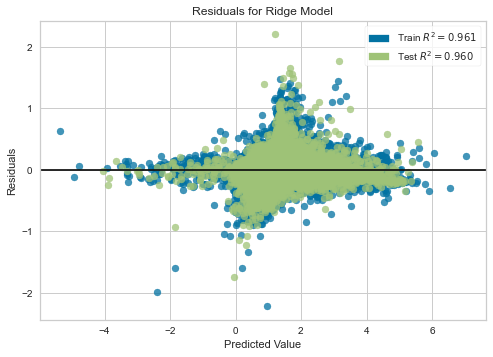

In [47]:
# Test for Rediuals 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(Ridge_regressor, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### RandomForest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error 

# Training the model
RandomForest_regressor = RandomForestRegressor( n_estimators=150 , max_depth= 4 )  
RandomForest_regressor.fit(X_train, y_train) 

#prediciting the values of both train and test using the model 
RandomForest_y_Train_pred = RandomForest_regressor.predict(X_train)
RandomForest_y_Test_pred = RandomForest_regressor.predict(X_test)

# training and testing RMSE
RandomForest_Train_RMSE = np.sqrt(mean_squared_error(y_train , RandomForest_y_Train_pred))
RandomForest_Test_RMSE = np.sqrt(mean_squared_error(y_test , RandomForest_y_Test_pred))

# R-square score
RandomForest_r2 = r2_score(y_test , RandomForest_y_Test_pred)

# Displaying the value 
print('R_SQUARE_score is {}'.format(RandomForest_r2))
print()
print('Training RMSE is {}'.format(RandomForest_Train_RMSE))
print('Testing RMSE is {}'.format(RandomForest_Test_RMSE))


R_SQUARE_score is 0.8802076867341491

Training RMSE is 0.22209062090150303
Testing RMSE is 0.2234895464469008


### Gradient Boosting Regressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score , mean_squared_error

GBoost_regressor= GradientBoostingRegressor( max_depth = 3 , n_estimators= 150 , learning_rate= 0.1 )
GBoost_regressor.fit(X_train, y_train)


#prediciting the values of both train and test using the model 
GBoost_y_Train_pred = GBoost_regressor.predict(X_train)
GBoost_y_Test_pred  = GBoost_regressor.predict(X_test)

# training and testing RMSE
GBoost_Train_RMSE = np.sqrt(mean_squared_error(y_train , GBoost_y_Train_pred))
GBoost_Test_RMSE = np.sqrt(mean_squared_error(y_test , GBoost_y_Test_pred))

# R-square score
GBoost_r2 = r2_score( y_test , GBoost_y_Test_pred)


print('R_SQUARE_score is {}'.format(GBoost_r2))
print()
print('Training RMSE is {}'.format(GBoost_Train_RMSE))
print('Testing RMSE is {}'.format(GBoost_Test_RMSE))

R_SQUARE_score is 0.968696177838697

Training RMSE is 0.11092217048907883
Testing RMSE is 0.11424611017222558


### XGBOOST Regressor

In [61]:
import xgboost as xgb
XGBoost_regressor = xgb.XGBRegressor( max_depth = 4 , n_estimators= 150 , learning_rate= 0.05 )
XGBoost_regressor.fit(X_train, y_train)

#prediciting the values of both train and test using the model 
XGBoost_y_Train_pred = XGBoost_regressor.predict(X_train)
XGBoost_y_Test_pred = XGBoost_regressor.predict(X_test)

# training and testing RMSE
XGBoost_Train_RMSE = np.sqrt(mean_squared_error(y_train , XGBoost_y_Train_pred))
XGBoost_Test_RMSE = np.sqrt(mean_squared_error(y_test , XGBoost_y_Test_pred))

# R-square score
XGBoost_r2 = r2_score( y_test, XGBoost_y_Test_pred)


print('R_SQUARE_score is {}'.format(XGBoost_r2))
print()
print('Training RMSE is {}'.format(XGBoost_Train_RMSE))
print('Testing RMSE is {}'.format(XGBoost_Test_RMSE))

R_SQUARE_score is 0.9696540049631589

Training RMSE is 0.10931037686285514
Testing RMSE is 0.11248469358911442


### XGBOOST Regressor-GridsearchCV

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score , mean_squared_error
# Fitting XGBoost to the Training set
import xgboost as xgb
xgb1 = xgb.XGBRegressor()
parameters = {'learning_rate': [0.03, 0.05, 0.07,0.02,0.01,0.1], 
              'max_depth': [3,4,5,6],
              'n_estimators': [100,200,400,600,700,1000]}

xgb_grid = GridSearchCV(xgb1,parameters,cv = 3,n_jobs = -1,verbose=10,scoring='r2')

xgb_grid.fit(X_train, y_train)
### XGBOOST Regressor
XGBgs_y_pred = xgb_grid.predict(X_test)
XGBgs_y_pred_train = xgb_grid.predict(X_train) 


score = r2_score(y_test,XGBgs_y_pred)
XGBoostGS_Test_RMSE = np.sqrt(mean_squared_error(y_test,XGBgs_y_pred))
XGBoostGS_Train_RMSE = np.sqrt(mean_squared_error(y_train,XGBgs_y_pred_train))

parameter = xgb_grid.best_params_

print('R_SQUARE_score is {}'.format(XGBoostGS_r2))
print('Training RMSE is {}'.format(XGBoostGS_Train_RMSE))
print('Testing RMSE is {}'.format(XGBoostGS_Test_RMSE))
print()
print('The best parameters are : {} '.format(parameter))

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 46.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 56.0min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 63.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 69.5min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed: 7

R_SQUARE_score is 0.9741890523413631
Training  RMSE is 0.09067740089425824
Testing RMSE is 0.10373963448247225

The best parameters are : {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 1000} 


In [57]:
# model scoring 
def cv_rmse(model, X=X, y=y):
    rmse = np.sqrt(-cross_val_score(model, X, y,scoring="neg_mean_squared_error",cv=3))
    return (rmse)

cv_rmse(xgb_grid,X_train,y_train).mean()

0.10438266539122136

In [66]:
results = pd.DataFrame({ 'Model'      : ['Ridge Regression','Random Forest Regressor','Gradient Boosting','XGBoost' ,'XGBoost(Hyperparameter tuning)'] ,
                         'R2'         : [ Ridge_r2, RandomForest_r2, GBoost_r2         , XGBoost_r2         ,XGBoostGS_r2] ,
                         'Test RMSE'  : [ Ridge_Test_RMSE, RandomForest_Test_RMSE, GBoost_Test_RMSE  , XGBoost_Test_RMSE  ,XGBoostGS_Test_RMSE] ,
                         })

results.set_index('Model' , inplace = True )
results

,R2,Test RMSE
Model,,
Ridge Regression,0.9601,0.1291
Random Forest Regressor,0.8802,0.2235
Gradient Boosting,0.9686,0.1142
XGBoost,0.9697,0.1125
XGBoost(Hyperparameter tuning),0.9741,0.1037


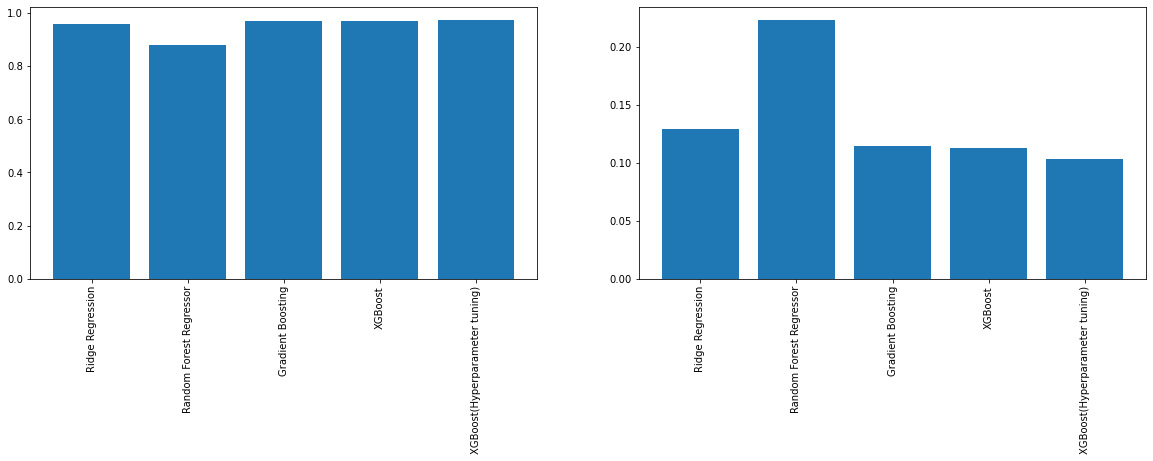

In [67]:
import pandas as pd 
import matplotlib.pyplot as plt
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (20,5))
ax1.bar(results.index , results['R2'])
ax2.bar(results.index , results['Test RMSE'])
ax1.set_xticklabels(results.index, rotation=90)
ax2.set_xticklabels(results.index, rotation=90)
plt.show()

XgBoost regression Model with a R2 value of 0.9741 and has the lowest Test RMSE of 0.103, is the best performing model. Let us check the same with validation set we kept aside.

### Validating the model with validation set 

In [56]:
y_pred_val = xgb_grid.predict(X_val)
r2_val = r2_score(y_val , y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val , y_pred_val))

print('The validation set R square value is {}'.format(r2_val))
print('The validation set RMSE value is {}'.format(rmse_val))

The validation set R square value is 0.9748608163875816
The validation set RMSE value is 0.101570721939215


- As we can see that the results of XGBoost Regressor model on the validation set is consistent with the above results. Hence, it is the best performing model. 
- As we log transformed the target variable, the prediction which we will get will be in log form too. Hence we can use np.exp for the same to convert from log to normal scale while future prediction.